In [88]:
frase = "   prova   "
print(f"{frase.lstrip() = }")
print(f"{frase.rstrip() = }")
print(f"{frase.strip() = }")

frase.lstrip() = 'prova   '
frase.rstrip() = '   prova'
frase.strip() = 'prova'


In [89]:
frase = "Ciao pippo"

print(f"{frase.find("ppo", 4) = }")
print(f"{frase.rfind("ppo", 4) = }")

frase.find("ppo", 4) = 7
frase.rfind("ppo", 4) = 7


In [90]:
elenco_ricercatori = [" ", "\\", "/", ",", ".", "-", "{", "}", "[", "]", "(", ")"]

# TODO FIX THIS SHIT
testo = "Prova testo alessio cimma"
puntatore_pos = 12

# movimento verso destra
dst = len(testo)
for ricercatore in elenco_ricercatori:
    candidato = testo.find(ricercatore, puntatore_pos + 1)
    print(candidato)
    if candidato >= 0:
        dst = min(candidato, dst)

print(f"Risultato: {dst}")

19
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
Risultato: 19


In [91]:
import svgwrite

# Create an SVG drawing object with specific size
# dwg = svgwrite.Drawing('examplelow.svg', size=("500px", "500px"), profile='tiny')
# dwg = svgwrite.Drawing('examplehigh.svg', size=("1000px", "1000px"), profile='tiny')
dwg = svgwrite.Drawing('examplerec.svg', size=("1000px", "500px"), profile='tiny')

# Add a title and description for accessibility and documentation
# dwg.add(dwg.title("SVG Example"))
# dwg.add(dwg.desc("An example SVG file created using svgwrite"))

# Draw background
dwg.add(dwg.rect(insert=(0, 0), size=("100%", "100%"), fill="lightgray"))


# Draw a rectangle with rounded corners
dwg.add(dwg.rect(insert=(10, 10), size=(200, 100), rx=15, ry=15, fill='lightblue', stroke='black', stroke_width=2))

# Draw a circle
dwg.add(dwg.circle(center=(300, 100), r=50, fill='lightgreen', stroke='black', stroke_width=2))

# Draw an ellipse
dwg.add(dwg.ellipse(center=(400, 300), r=(80, 40), fill='lightcoral', stroke='black', stroke_width=2))

# Draw a line
dwg.add(dwg.line(start=(10, 300), end=(200, 400), stroke='purple', stroke_width=3))

# Draw a polyline (multiple connected line segments)
dwg.add(dwg.polyline(points=[(100, 100), (150, 50), (200, 150), (250, 100)], fill='none', stroke='orange', stroke_width=2))

# Draw a polygon (closed shape)
dwg.add(dwg.polygon(points=[(50, 300), (150, 350), (100, 400)], fill='yellow', stroke='black', stroke_width=2))

# Add some text
dwg.add(dwg.text("Hello SVG!", insert=(100, 450), fill='blue', font_size="30px", font_family="Caskadya"))

# Add a complex path (triangle with a curve)
dwg.add(dwg.path(d="M 300 300 L 350 350 Q 400 300 450 350 Z", fill="lightpink", stroke="black", stroke_width=2))

# Create a group and apply transformations (rotate and scale)
group = dwg.g(id='group1', transform="rotate(45, 200, 200) scale(1.5)")
group.add(dwg.rect(insert=(200, 200), size=(100, 50), fill='none', stroke='blue', stroke_width=2))
group.add(dwg.circle(center=(300, 300), r=30, fill='none', stroke='red', stroke_width=2))
dwg.add(group)

# Save the SVG file
dwg.save()

print("SVG file 'example.svg' created successfully!")


SVG file 'example.svg' created successfully!


[0.0, 2.5, 5.0, 7.5, 10.0, 12.5]


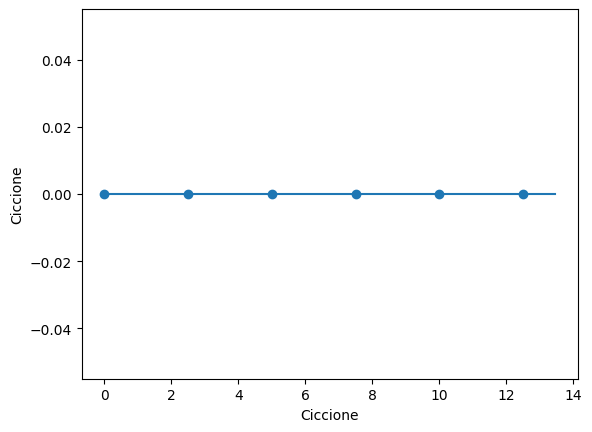

In [106]:
import matplotlib.pyplot as plt
from math import ceil, floor
import numpy as np


def predicter(x):

    def power_converter(value):

        if value >= 0:
            return float("1" + "0" * value)            
        else:
            return 1 / float("1" + "0" * -value)            


    min_ticks = 3
    max_ticks = 10
    nice_values = [1, 2, 2.5, 5, 10]
    
    all_combinations = []
    power_per_tick = []

    delta = x[-1] - x[0]    

    for n_ticks in range(min_ticks, max_ticks + 1):
        
        spacing = abs(delta / n_ticks)

        run = 1
        power = 0

        while run:
            if spacing * power_converter(power) // nice_values[0] <= 1:
                power += 1
            elif spacing * power_converter(power) // nice_values[-1] >= 1:
                power -= 1

            if spacing * power_converter(power) // nice_values[0] >= 1 and spacing * power_converter(power) // nice_values[-1] <= 1:
                run = 0
            
        
        all_combinations.append([abs(spacing * power_converter(power) - value) for value in nice_values])
        power_per_tick.append(power_converter(-power))
        
    best_from_tick = []
    for single_tick in all_combinations:
        best_from_tick.append([min(single_tick), single_tick.index(min(single_tick))])

    minimo = np.inf
    indice_valore = 0
    indice_tick = 0

    
    for index, contendente in enumerate(best_from_tick):
        
        if contendente[0] <= minimo:
            minimo = contendente[0]
            indice_valore = contendente[1]
            indice_tick = index


    new_start = round(x[0] / (nice_values[indice_valore] * power_per_tick[indice_tick])) * (nice_values[indice_valore] * power_per_tick[indice_tick])
    
    ris = [round(new_start + nice_values[indice_valore] * power_per_tick[indice_tick] * i, 3) for i in range(0, indice_tick + min_ticks + 1)]
        
    # decido se tenere l'ultimo elemento
    while abs(x[-1] - ris[-1]) > abs(x[-1] - ris[-2]):
        ris.pop()

    print(ris)
    return ris



x = [-0.0100452340500, 13.454873]
y = [0, 0]

plt.plot(x, y)
plt.xlabel("Ciccione")
plt.ylabel("Ciccione")

new_x = predicter(x)

plt.scatter(new_x, [0 for _ in range(len(new_x))])
plt.show()


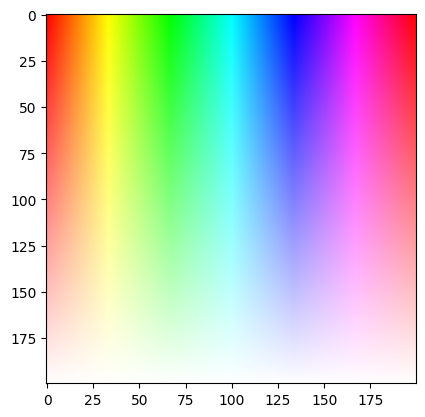

In [3]:
import matplotlib.pyplot as plt
import numpy as np

w, h = 200, 200 # resolution
mat = np.zeros((w, h, 3))

def interpolation(value):
    # 100 -> 110 -> 010 -> 011 -> 001 -> 101 -> 100
    #  0  ->  1  ->  2  ->  3  ->  4  ->  5  ->  6
    normalization_factor = 1 / 6
    index = value // normalization_factor
    inner_interpolation = (value % normalization_factor) / (1/6)

    def interpolate(x1, y1, z1, x2, y2, z2, value):
        
        if value == 0:
            x = x1
            y = y1
            z = z1
        else:
            x = x1 + (x2 - x1) * value
            y = y1 + (y2 - y1) * value
            z = z1 + (z2 - z1) * value

        return np.array([x, y, z])

    if index == 0:
        return interpolate(1, 0, 0, 1, 1, 0, inner_interpolation)
    elif index == 1:
        return interpolate(1, 1, 0, 0, 1, 0, inner_interpolation)
    elif index == 2:
        return interpolate(0, 1, 0, 0, 1, 1, inner_interpolation)
    elif index == 3:
        return interpolate(0, 1, 1, 0, 0, 1, inner_interpolation)
    elif index == 4:
        return interpolate(0, 0, 1, 1, 0, 1, inner_interpolation)
    elif index == 5:
        return interpolate(1, 0, 1, 1, 0, 0, inner_interpolation)
    elif index == 6:
        return np.array([1, 0, 0])

for x in range(w):
    # controls Hue
    mat[:, x, :] = interpolation(x / w) 

for y in range(h):
    # controls Saturation
    mat[y, :, :] *= 1 - (y / w)
    mat[y, :, :] += (y / w)

# controls Intensity
mat[:, :, :] *= 1

plt.imshow(mat)
plt.show()

In [ ]:
from tkinter import filedialog

NON_ESEGUIRE = False

if NON_ESEGUIRE:    
    from GRAFICA._modulo_elementi_grafici import Bottone_Push, PathButton

class BottoniCallbacks:
    def print_hello(bottone: 'Bottone_Push'):
        bottone.testo = "/green{Cliccato!}"


    def exit(bottone: 'Bottone_Push'):
        exit()


    def load_directory(bottone: 'PathButton'):
        print(filedialog.askdirectory())


    def load_file(bottone: 'PathButton'):
        print(filedialog.askopenfilename())


    def load_files(bottone: 'PathButton'):
        print(filedialog.askopenfilenames())


BottoniCallbacks.load_file()

C:/Users/aless/Desktop/default


C:/Users/aless/Desktop/default/calibrazione_mono.txt


('C:/Users/aless/Desktop/default/calibrazione_mono.txt', 'C:/Users/aless/Desktop/default/calibrazione_spettrometro.txt', 'C:/Users/aless/Desktop/default/ch1.txt')


In [1]:
import pygame

# Initialize pygame
pygame.init()

# Create a base surface
width, height = 800, 600
base_surface = pygame.Surface((width, height))

# Fill the base surface with a background color (optional)
base_surface.fill((255, 255, 255))  # White background

# Create another surface to blit onto the base surface
overlay_surface = pygame.Surface((200, 200))
overlay_surface.fill((255, 0, 0))  # Red square

# Blit the overlay surface onto the base surface
base_surface.blit(overlay_surface, (300, 200))

# Save the resulting surface as a PNG file
pygame.image.save(base_surface, "output_image.png")

# Quit pygame
pygame.quit()


pygame 2.6.0 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
